In [2]:
 # Import PyTorch
 import torch
 from torch import nn

 # Import torchvision
 import torchvision
 from torchvision import datasets
 from torchvision import transforms
 from torchvision.transforms import ToTensor

 # Import matplotlib for visualization
 import matplotlib.pyplot as plt

 # Check versions
 print(torch.__version__)
 print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## Getting a dataset

The dataset we will be using is FashionMNIST from torchvision.datasets

In [3]:
# setup training data
train_data = datasets.FashionMNIST(
    root = "data", # where to download the data to?
    train = True, # do we eant the training dataset?
    download = True, # do we want to download the dataset?
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data?
    target_transform = None # how do we want to transform the labels/targets?
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:07<00:00, 3624821.30it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 333620.48it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 1092351.24it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4413793.33it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# see the first training example
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
# checking the shape of our image
image.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Ankle boot')

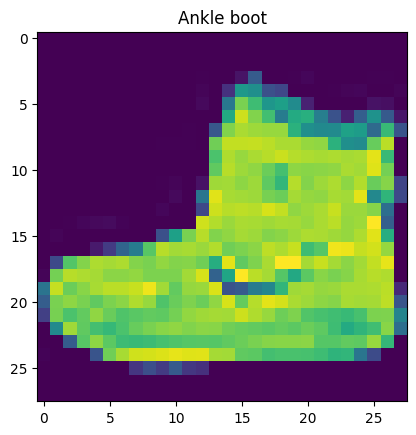

In [10]:
image, label = train_data[0]
plt.imshow(image.squeeze())
plt.title(class_names[label])

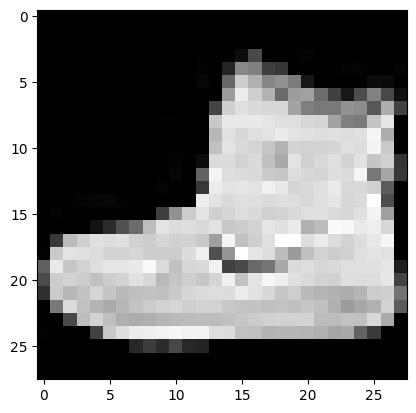

In [11]:
plt.imshow(image.squeeze(), cmap = "gray")

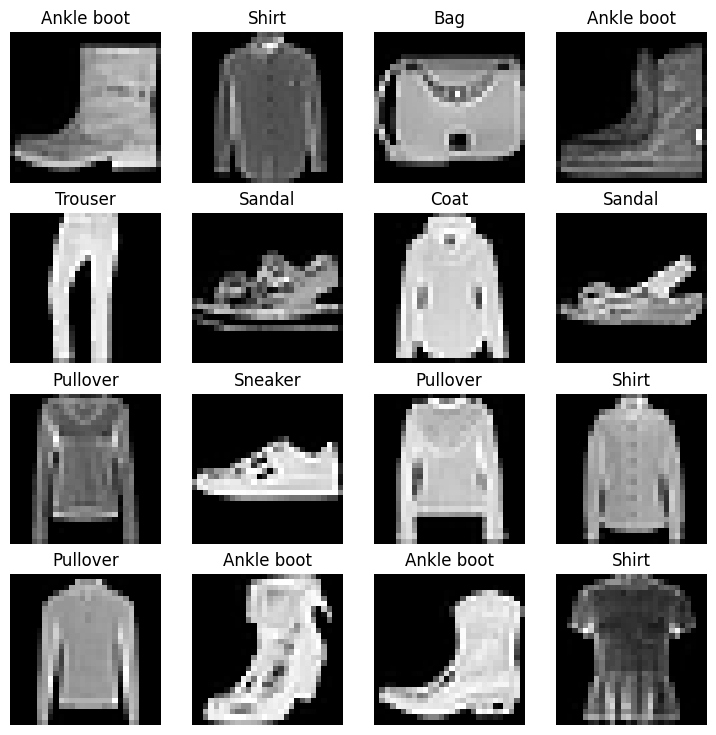

In [12]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

### Prepare DataLoader

Right now, our data is in the form of PyTorch datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to tuen our data into mini-batches.

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [13]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

len(train_dataloader)

1875

In [14]:
60000/32

1875.0

In [15]:
# Check out what's inside the training dataloader
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape, len(train_features_batch)

(torch.Size([32, 1, 28, 28]), torch.Size([32]), 32)

In [16]:
random_idx = torch.randint(0, len(train_features_batch), (1,)).item()
random_idx

21

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


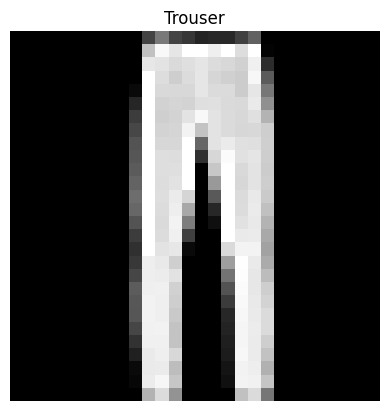

In [17]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

 ## Model 0: Build a baseline model
When starting to build a series of ML modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simply and add complexity when necessary.

In [18]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out ehat happened
print(f"Shape before flattening: {x.shape} -> [Color_channel, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [Color_channel, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape = 784, # this is 28*28
    hidden_units = 10, # number of hidden units
    output_shape = len(class_names) # one for every class
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [22]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [23]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [24]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

## Creating a training loop and training a model on batches of data
Steps:
1. Loop thrugh epochs
2. Loop through training batches, perform training steps, calculate the train loss per batch
3. Loop through testing batches, perform testing steps, calculate the test loss per batch
4. Print out what's happening

In [25]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the see
torch.manual_seed(42)

# Set the number of epochs
epochs = 3

# Creating training and testing loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  #Training
  train_loss = 0

  # Add a loop to loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()

    # Forward pass
    y_pred = model_0(X)

    # Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero_grad
    optimizer.zero_grad()

    # Back propagation
    loss.backward()

    # Optimizer step
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  # divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  #Testing
  test_loss = 0
  model_0.eval()

  with torch.inference_mode():
    for X, y in test_dataloader:
      # Forward pass
      test_pred = model_0(X)

      # Calculate the loss
      test_loss += loss_fn(test_pred, y)

    # Divide total test loss by length of test dataloader
    test_loss /= len(test_dataloader)

  # Print out whats happening
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}\n")




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954

Epoch: 1
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989

Epoch: 2
-----
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664



## Make predictions and get Model_0 results

In [26]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module):

  """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
  loss = 0
  model.eval()

  with torch.inference_mode():
    for X, y in dataloader:
      # Make prediction
      y_pred = model(X)

      # Calculate the loss
      loss += loss_fn(y_pred, y)

    # Calculate the average loss per batch
    loss /= len(dataloader)

    return {"model name": model.__class__.__name__,
            "loss": loss.item()}

model_0_results = eval_model(model= model_0,
                           dataloader= test_dataloader,
                           loss_fn= loss_fn)
model_0_results

{'model name': 'FashionMNISTModelV0', 'loss': 0.47663894295692444}

## Model 1: Building a better model with non-linearity


In [27]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
      super().__init__()
      self.layer_stack = nn.Sequential(
          nn.Flatten(), # flatten inputs into single vector
          nn.Linear(in_features=input_shape, out_features=hidden_units),
          nn.ReLU(),
          nn.Linear(in_features=hidden_units, out_features=output_shape),
          nn.ReLU()
      )

  def forward(self, x: torch.Tensor):
      return self.layer_stack(x)

In [28]:
# Create an instance of model_1
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(input_shape = 784,
                              hidden_units = 10,
                              output_shape = len(class_names))
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [29]:
next(model_1.parameters()).device

device(type='cpu')

In [30]:
from helper_functions import accuracy_fn
# creating a loss function for our new mosel
loss_fn = nn.CrossEntropyLoss()

# Creating optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

## Functionizing training and evaluation/testing loops


In [31]:
torch.manual_seed(42)

def training_step(model: torch.nn.Module,
                  dataloader: torch.utils.data.DataLoader,
                  loss_fn: torch.nn.Module,
                  optimizer: torch.optim.Optimizer):
  train_loss = 0

  for batch, (X,y) in enumerate(dataloader):
    model_1.train()

    # Create a forward pass
    y_pred = model(X)

    # Calculate the loss ans accuracy
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc = accuracy_fn(y_true = y,
                            y_pred = y_pred.argmax(dim=1)) # Go from logits -> pred labels
    # Optimizer zero_grad
    optimizer.zero_grad()

    # Back propagation
    loss.backward()

    # Optimizer step
    optimizer.step()

  # Calculate the loss per batch
  loss/= len(dataloader)

  print(f"Train loss: {loss:.5f} | Training accuracy: {train_acc}")

In [32]:
def testing_step(model: torch.nn.Module,
                 dataloader: torch.utils.data.DataLoader,
                 loss_fn: torch.nn.Module):

  # initialize test loss to be 0
  test_loss = 0

  # Put the model to eval mode
  model.eval()

  for X, y in dataloader:
    # Forward pass
    test_pred = model(X)

    # Calculate the loss and accuracy
    loss = loss_fn(test_pred, y)
    test_loss += loss
    test_acc = accuracy_fn(y_true = y,
                           y_pred = test_pred.argmax(dim=1))

  # Adjust the metrics
  test_loss /= len(dataloader)

  print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc}")


In [33]:
torch.manual_seed(42)

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  training_step(model = model_1,
                dataloader = train_dataloader,
                loss_fn = loss_fn,
                optimizer = optimizer)
  testing_step(model=model_1,
               dataloader = test_dataloader,
               loss_fn=loss_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.00052 | Training accuracy: 62.5
Test loss: 0.95636 | Test accuracy: 75.0
Epoch: 1
-----
Train loss: 0.00046 | Training accuracy: 62.5
Test loss: 0.72227 | Test accuracy: 87.5
Epoch: 2
-----
Train loss: 0.00054 | Training accuracy: 71.875
Test loss: 0.68500 | Test accuracy: 87.5


In [34]:
model_1_results = eval_model(model= model_1,
                           dataloader= test_dataloader,
                           loss_fn= loss_fn)
model_1_results

{'model name': 'FashionMNISTModelV1', 'loss': 0.6850009560585022}

In [35]:
model_0_results

{'model name': 'FashionMNISTModelV0', 'loss': 0.47663894295692444}

## Creating a model with CNN


In [36]:
import torch
from torch import nn

In [37]:
class FashioMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, # there is a trick in calculating this
                  out_features = output_shape)
    )

  def forward(self, x):
    return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [38]:
torch.manual_seed(42)
model_2 = FashioMNISTModelV2(input_shape = 1,
                             hidden_units = 10,
                             output_shape = len(class_names))
model_2

FashioMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Setup a loss function and optimizer for CNN model

In [39]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.1)

### Training and testing CNN model using our training and testing functions


In [40]:
torch.manual_seed(42)

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  training_step(model = model_2,
                dataloader = train_dataloader,
                loss_fn = loss_fn,
                optimizer = optimizer)
  testing_step(model = model_2,
               dataloader = test_dataloader,
               loss_fn = loss_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.00017 | Training accuracy: 93.75
Test loss: 0.40055 | Test accuracy: 81.25
Epoch: 1
-----
Train loss: 0.00026 | Training accuracy: 78.125
Test loss: 0.36872 | Test accuracy: 81.25
Epoch: 2
-----
Train loss: 0.00013 | Training accuracy: 90.625
Test loss: 0.35887 | Test accuracy: 93.75


### Making a confusion matrix for further prediction evaluation

In [41]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Make predictions with trained model
y_preds = []
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making predictions..."):
    # Forward pass
    y_logit = model_2(X)

    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit, dim = 1).argmax(dim = 1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)

    # append y_preds
    y_preds.append(y_pred)

# concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [43]:
len(y_pred_tensor)

10000

In [45]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 54.6 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [46]:
mlxtend.__version__

'0.23.1'

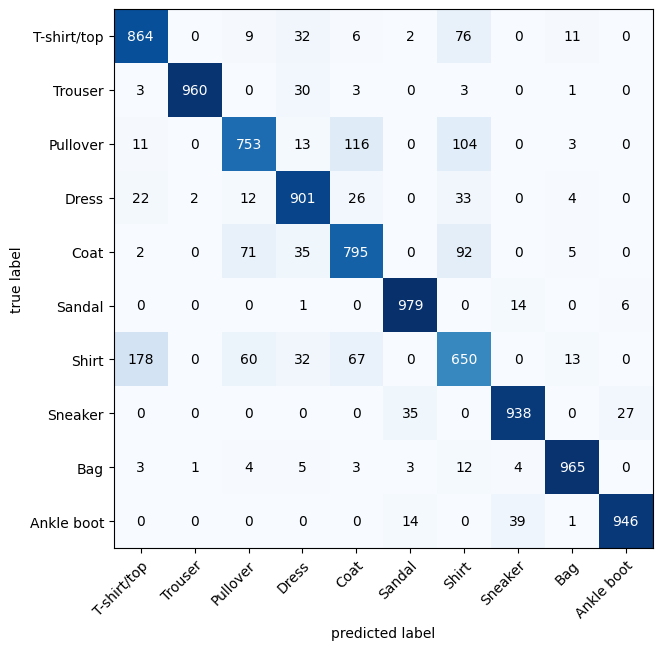

In [47]:
# Lets plot the confusion matrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instances and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize = (10, 7)
)

### Save the best performing model

In [48]:
from pathlib import Path

# Create model's directory (if it does not already exists)
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, # Create parent directories if needed
                 exist_ok = True) # if models directory already exists, don't throw an error

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model's state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(), #Only saving the state dict, only saves the learned parameters
           f = MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision.pth


## Loading the saved model

In [56]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashioMNISTModelV2(input_shape=1,
                                    hidden_units=10,
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [54]:
loaded_model_2

FashioMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [59]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    dataloader=test_dataloader,
    loss_fn=loss_fn
)

loaded_model_2_results

{'model name': 'FashioMNISTModelV2', 'loss': 0.3588678240776062}